In [102]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split

In [103]:
bank_data = pd.read_csv("bank-marketing.csv", sep=";")
bank_data = bank_data.loc[:,['age','default','cons.price.idx','cons.conf.idx','y']]
bank_data.head(5)

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,93.994,-36.4,no
1,57,unknown,93.994,-36.4,no
2,37,no,93.994,-36.4,no
3,40,no,93.994,-36.4,no
4,56,no,93.994,-36.4,no


In [104]:
bank_data['default']= bank_data['default'].map({'yes':1,'no':0,'unknown':0})
bank_data['y']= bank_data['y'].map({'yes':1,'no':0})
bank_data.head()

,age,default,cons.price.idx,cons.conf.idx,y
0,56,0,93.994,-36.4,0
1,57,0,93.994,-36.4,0
2,37,0,93.994,-36.4,0
3,40,0,93.994,-36.4,0
4,56,0,93.994,-36.4,0


In [105]:
x=bank_data.drop('y',axis='columns')
y=bank_data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [106]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.fit(x_test,y_test)

RandomForestClassifier()

In [107]:
y_pred=model.predict(x_test)

In [108]:
model.score(x_test,y_test)

0.9193979121145909

In [109]:
accuracy_score(y_test,y_pred)

0.9193979121145909

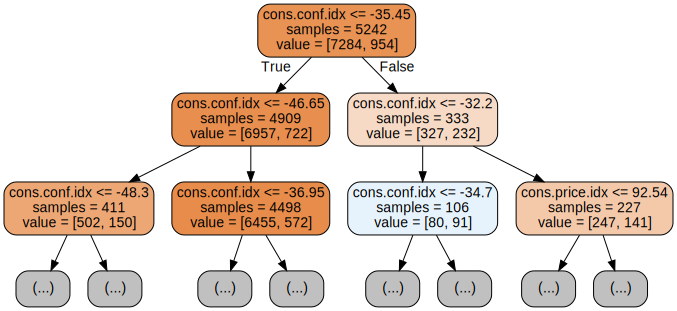

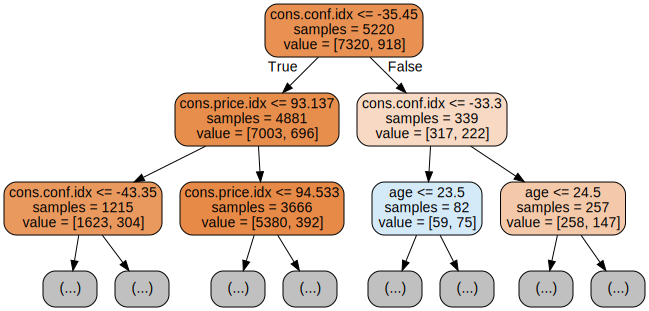

In [110]:
for i in range(2):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               filled=True,
                               rounded=True,
max_depth=2,
impurity=False,
                               proportion=False)
    graph = graphviz.Source(dot_data)
    display(graph)

In [111]:
param_dist = {'n_estimators': [96],
              'max_depth': [5]}

rf = RandomForestClassifier()


rand_search = RandomizedSearchCV(rf, param_distributions = param_dist , n_iter=5, cv=5)


rand_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [5], 'n_estimators': [96]})

In [112]:
best_rf = rand_search.best_estimator_


print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 96, 'max_depth': 5}


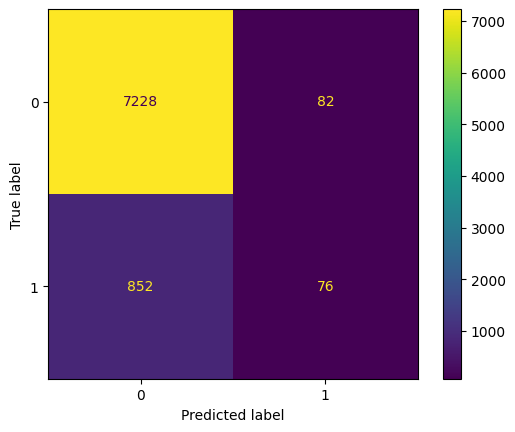

In [113]:
y_pred = best_rf.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [114]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8866229667394999
Precision: 0.4810126582278481
Recall: 0.08189655172413793


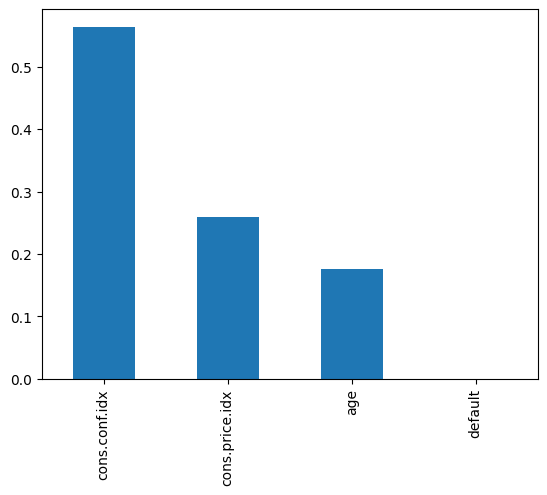

In [115]:
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)


feature_importances.plot.bar(10);

In [116]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7310
           1       0.48      0.08      0.14       928

    accuracy                           0.89      8238
   macro avg       0.69      0.54      0.54      8238
weighted avg       0.85      0.89      0.85      8238

[[7228   82]
 [ 852   76]]


<Axes: >

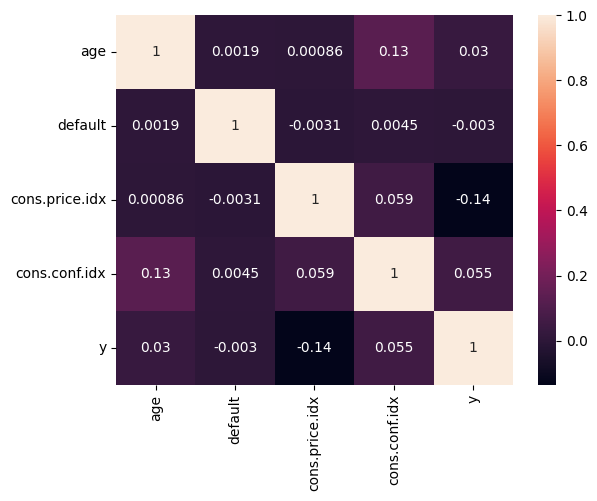

In [117]:
sns.heatmap(bank_data.corr(),annot=True)

<Axes: xlabel='age', ylabel='Count'>

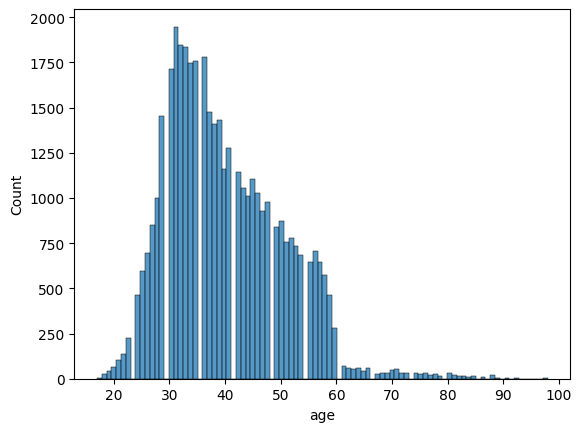

In [120]:
sns.histplot(bank_data['age'])

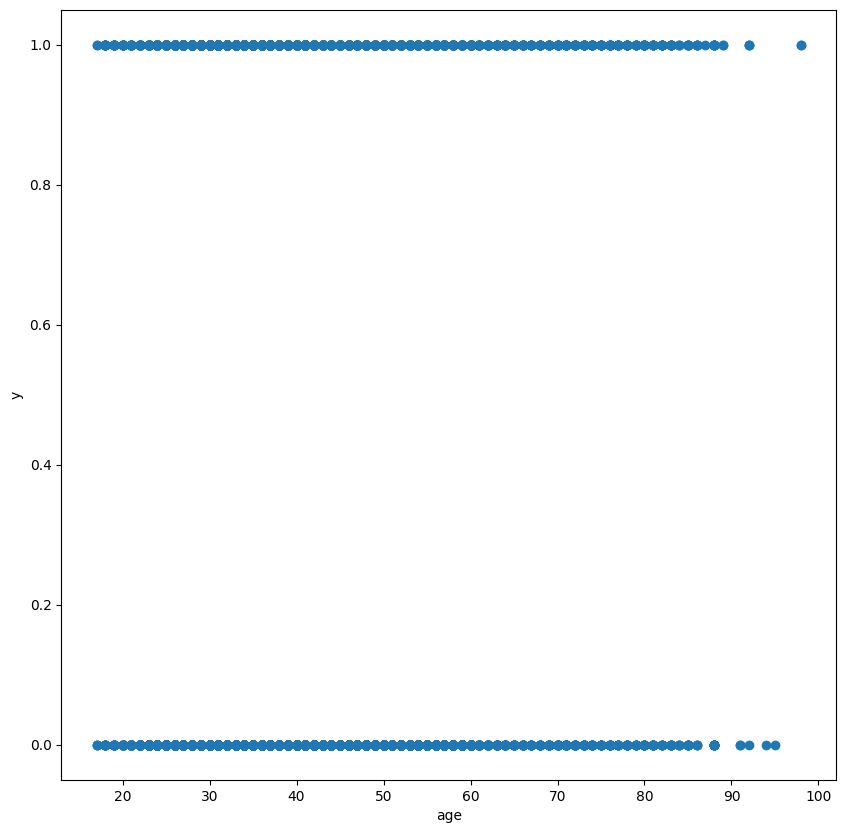

In [132]:
import matplotlib.pyplot as plt, seaborn as sns
plt.figure(figsize=(10,10))
plt.scatter(bank_data['age'],bank_data['y'])
plt.xlabel('age')
plt.ylabel('y')
plt.show()